In [2]:
import numpy as np # General numerical tools
import h5py as h5py # File management
import matplotlib.pyplot as plt # Plotting tools

144.0699040887944
b'000841'


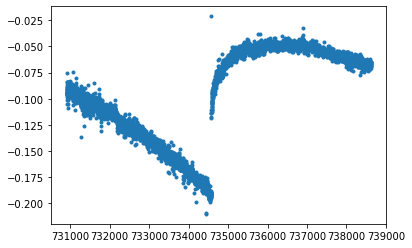

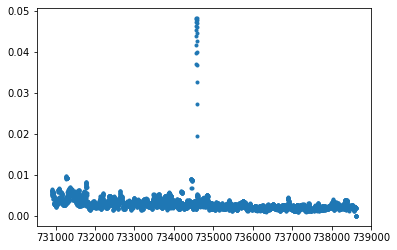

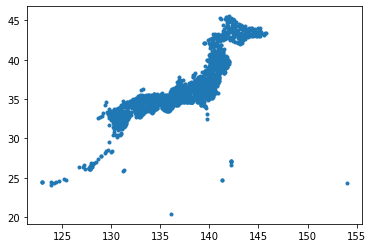

In [3]:
# Read in data 
hdf5_file = h5py.File("./test.hdf5", "r")
datef = np.array(hdf5_file.get("date"))
eastposf = np.array(hdf5_file.get("eastpos"))
northposf = np.array(hdf5_file.get("northpos"))
eastuncf = np.array(hdf5_file.get("eastunc"))
northuncf = np.array(hdf5_file.get("northunc"))
lon = np.array(hdf5_file.get("lon"))[:,0]
lat = np.array(hdf5_file.get("lat"))[:,0]
name = np.array(hdf5_file.get("name"))
hdf5_file.close()
print(lon[0]+5)
print(name[0][0])
# Choose a station
staidx = 1

# Make a plot of positions
fig, ax = plt.subplots() # Set up the axes
ax.plot(datef[staidx, datef[staidx, :] != 0], eastposf[staidx, datef[staidx, :] != 0], '.') # Place time vs. position in those axes for specified station
plt.show()

# Make a plot of uncertainties
fig, ax = plt.subplots() # Set up the axes
ax.plot(datef[staidx, datef[staidx, :] != 0], eastuncf[staidx, datef[staidx, :] != 0], '.') # Place time vs. position in those axes for specified station
plt.show()

fig, ax = plt.subplots()
ax.plot(lon, lat, '.')
plt.show()


# Calculate daily uncertainties

Use a 21-day moving window and assign standard deviation as uncertainty

In [8]:
time_window = 20
htime_window = time_window//2

eastuncf = np.zeros_like(eastposf)
northuncf = np.zeros_like(eastposf)

for i in range(datef.shape[0]):
    for j in range(htime_window, datef.shape[1]-htime_window):
        this_index = np.arange(j-htime_window, j+htime_window)
        this_east = eastposf[i, this_index]
        this_north = northposf[i, this_index]
        eastuncf[i, j] = np.std(this_east[this_east != 0])
        northuncf[i, j] = np.std(this_north[this_north != 0])


/Users/jloveles/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jloveles/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jloveles/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
northuncf[np.isnan(northuncf)] = 0
eastuncf[np.isnan(eastuncf)] = 0

for i in range(northuncf.shape[0]):
    eastuncf[i, eastuncf[i, :] == 0] = np.mean(eastuncf[i, eastuncf[i, :] == 0])
    northuncf[i, northuncf[i, :] == 0] = np.mean(northuncf[i, northuncf[i, :] == 0])

In [21]:
# Write uncertainties to HDF file
with h5py.File('test.hdf5', 'a') as f:
    f.create_dataset("eastunc", data = eastuncf)
    f.create_dataset("northunc", data = northuncf)